-- 5 septiembre 2024 M4G2

### Idea Random Forest

<img src="rforest.png" alt="Alt text" style="width: 800px;"/>

1. Creamos un conjunto de datos $D$, tomando muestras aleatorias con reemplazo del dataset  original
2. Entrenamos un árbol de decisión sobre $D$, usando sólo algunas columnas seleccionadas aleatoriamente.
3. Repetir pasos 1 y 2 varias veces. 
4. Al final, se toma el promedio / moda de las predicciones hechas por cada estimador


In [1]:
# El tener esta variedad de árboles es la clave para hacer mejores estimaciones que con un solo árbol.

Takeaway: El "ensemble learning" es una técnica que combina las predicciones de múltiples algoritmos de ML para elaborar predicciones más precisas que las que haría un modelo individual

Además, como se hace bootstrap + agregación  --> 'Bagging'

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('boston_house_prices.csv')
predictors = df.loc[:,'CRIM':'LSTAT']
response = df['MEDV']
df.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,A1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,A2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,A3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,A4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,A5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.25, 
                                                    random_state=42)

param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [4,5,10,12,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,20]
}

#estandarizar variables:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("MEJORES Hiperparámetros:", grid_search.best_params_)

y_pred=grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)



MEJORES Hiperparámetros: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}
MSE:  9.957439693935129


In [5]:
9.96/11.34-1 #mejoramos 12.16% respecto a un solo arbol

-0.12169312169312163

In [6]:
# vs OLS 
9.96/24.88-1

-0.5996784565916398

In [7]:
# vs Lasso
9.96/22.11-1

-0.5495251017639077

In [8]:
# vs Ridge
9.96/21.79-1

-0.5429095915557595

Considerar lo siguiente: 
1. El RF puede llegar a presentar tmb overfitting.
2. Para variables categóricas los RF tienden a favorecer variables con muchos niveles. 
    

## Volvemos ahora a los modelos de "clasificación" o predicción de que "un evento suceda"

### Regresión Logística

## Descripción general, objetivo.

Tenemos un evento de interés que podemos modelar mediante una variable $Y$, de forma tal que $ Y=1$ si el evento ocurre, $Y=0$  e.o.c

**IDEA CENTRAL**: Queremos modelar la probabilidad condicional $P(Y=1|X=x)$ como función de $x$. ¿Podríamos usar regresión lineal? :) 

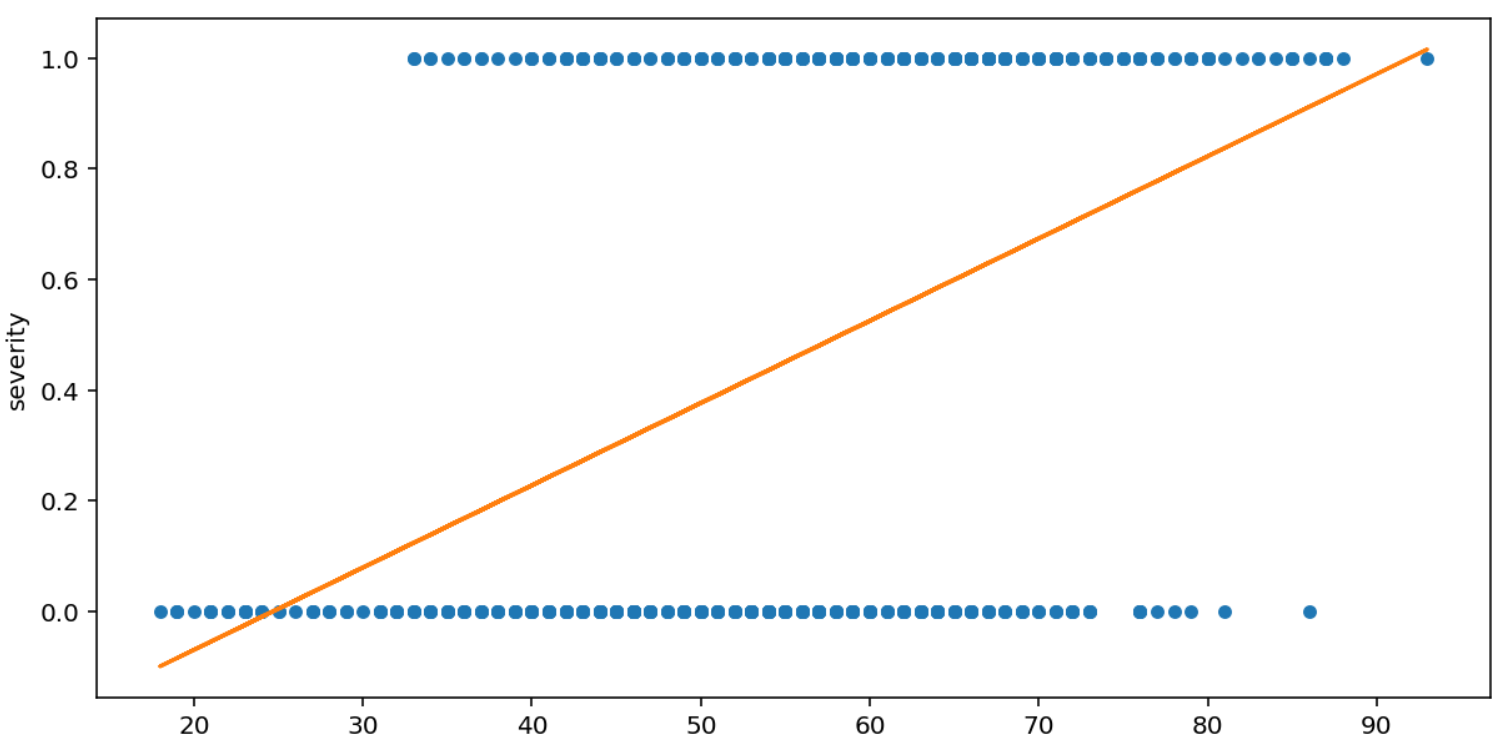

<img src="rlog.png" alt="Alt text" style="width: 500px;"/>

1. Es un método estadístico utilizado para predecir la **probabilidad** de un resultado (a menudo binario) en función de una o más variables predictoras

2. Concepto central de la regresión logística es ajustar una curva logística (también conocida como función sigmoide) a los datos, lo que nos permite predecir la probabilidad de un suceso dadas las variables de entrada. 

Algunos términos y notación:

3. Variable dependiente o variable respuesta: Generalmente es binaria (por ejemplo, 0 o 1, verdadero o falso, sí o no).

4. Variables independientes o predictores: Pueden ser continuas (por ejemplo, edad, ingresos) o categóricas (por ejemplo, género, nivel educativo).

5. Momio (Odds): Si $Y=1$ denota 'el evento de interés ocurre' y $Y=0$ denota que dicho evento 'no ocurre', entonces el momio se define como:

$$
   \frac{P(Y=1)}{1-P(Y=1)}
$$

   donde $P(*)$ denota una función de probabilidad.

6. Por ejemplo, si la probabilidad de que un cliente compre un producto es del 0,8, el momio de que compre el producto es de 0,8/(1-0,8) = 4.

7. Función logit: Logaritmo natural del momio, también conocido como 'log odds':
$$
    ln \left(\frac{P(Y=1)}{1-P(Y=1)}\right)
$$
la cual se asume como una función lineal de las variables predictoras.

8. Estimación de máxima verosimilitud: La regresión logística utiliza la estimación de máxima verosimilitud para estimar los parámetros del modelo. El objetivo es encontrar los valores de los parámetros que maximizan la verosimilitud de los datos observados.


-- fin clase 5 sep '24

### Formulación del modelo

Sea $y$ la variable de resultado binaria (0 o 1) y sea $\boldsymbol{x}=(x_1,x_2,\ldots,x_p)$ el vector de $p$ predictoras. El modelo de regresión logística asume que el logit de la probabilidad de $y=1$ es una función lineal de $\boldsymbol{x}$:

$$ln \left(\frac{p(y=1 \mid \boldsymbol{x})}{1-p(y=1 \mid \boldsymbol{x})}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p,$$

donde $\beta_0,\beta_1,\ldots,\beta_p$ son los coeficientes (o pesos) que queremos estimar.

El lado izquierdo de la ecuación es el logit (o log-odds) de la probabilidad de que $y=1$ dada $\boldsymbol{x}$. El logit se transforma de nuevo en una probabilidad utilizando la función logística:

$$p(y=1 \mid \boldsymbol{x}) = \frac{1}{1+\exp(-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p))}.$$

Esto nos da la probabilidad predicha de que $y=1$ dada $\boldsymbol{x}$.

Durante el entrenamiento del modelo, estimamos los valores de los coeficientes $\beta_0,\beta_1,\ldots,\beta_p$ maximizando la verosimilitud de los datos observados. La función de verosimilitud está dada por:

$$\mathcal{L}(\beta_0,\beta_1,\ldots,\beta_p) = \prod_{i=1}^n p(y_i \mid \boldsymbol{x}_i)^{y_i} (1-p(y_i \mid \boldsymbol{x}_i))^{1-y_i},$$

donde $n$ es el número de observaciones, $y_i$ es el resultado binario para la $i$-ésima observación y $\boldsymbol{x}_i$ es el vector de predictoras para la $i$-ésima observación. 

Utilizamos técnicas de optimización numérica, como el descenso de gradiente o el método de Newton, para encontrar los valores de los coeficientes que maximizan la función de verosimilitud.

Recordemos:
1. $\ln(a \cdot b) = \ln(a) + \ln(b)$

2. $\ln(x^a) = a \cdot \ln(x)$

Denotemos **$p(y_i \mid \boldsymbol{x}_i) = p(x_i;\beta)$**. Por conveniencia, podemos tomar la log verosimilitud:
$$
    \ln L(\{ p(x) \}) = \sum_{i=1}^N \{ y_i \ln p(x_i;\boldsymbol\beta) + (1-y_i) \ln [1-p(x_i;\boldsymbol\beta)] \}
$$

Se puede usar cálculo para derivar las ecuaciones de maximización. Sin embargo éstas NO son lineales y no pueden resolverse de forma analítica. (a diferencia del caso de regresión lineal (OLS)) --> Usar optimización numérica


Una vez que se optienen los valores óptimos $\hat\beta_0, \hat\beta_1,..., \hat\beta_p$ estimamos la $P(Y=1|X=x)$ como:

$$
    P(Y=1|X= \boldsymbol x)=\frac{\exp[\hat\beta_0 + \hat\beta_1 x_1 + \cdots + \hat\beta_p x_p]}{1+\exp[\hat\beta_0 + \hat\beta_1 x_1 + \cdots + \hat\beta_p x_p]}
$$

#### ¿Cómo se maximiza la función de verosimilitud en Reg Logística?
**Gradient Descent**


In [9]:
## Ejemplo: implementación de un modelo de Reg Logística.
pd.set_option('display.max_columns', None) # para ver todas las columnas

In [10]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True) #para que lo importe como un df
df.frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Descripción de variables

El conjunto de datos de Wisconsin sobre el diagnóstico del cáncer de mama contiene información sobre diversas características de los núcleos de las células de mama, que han sido extraídas de imágenes digitalizadas de biopsias por aspiración con aguja fina (FNA). El conjunto de datos incluye las siguientes variables:

1. Número de identificación: identificador único para cada paciente
2. Variable Respuesta: Diagnóstico - el diagnóstico de los tejidos mamarios (M = maligno (0), B = benigno (1))
3. Se calculan diez características para cada núcleo celular:
   * radio (media de distancias desde el centro hasta puntos en el perímetro)
   * textura (desviación estándar de los valores en escala de grises)
   * perímetro
   * área
   * suavidad (variación local en longitudes de radio)
   * compactación (perímetro^2 / área - 1.0)
   * concavidad (severidad de las porciones cóncavas del contorno)
   * puntos cóncavos (número de porciones cóncavas del contorno)
   * simetría
   * dimensión fractal ("aproximación de la línea costera" - 1) i.e. "coastline approximation" -1

Se calcularon la media, el error estándar y el "peor" o mayor (media de los tres valores más grandes) de estas características para cada imagen, resultando en un total de 30 características para cada paciente.

Distribución de clases: 357 benignos, 212 malignos

In [11]:
#c2

In [12]:
df.frame.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [13]:
df.frame.target.value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [14]:
df

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

### Implementación de un modelo de Regresión Logística

In [15]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.3, random_state=42)

#Estandarizar:
scaler = StandardScaler() #(X  - promedio (X))/desv(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Ajustar modelo de regresión logística:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

#predicciones:
y_pred = lr_model.predict(X_test)

#Evaluar accuracy del modelo:
accuracy = lr_model.score(X_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))



Accuracy: 98.25%


In [16]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [17]:
lr_model.predict_proba(X_test)

array([[1.17959104e-01, 8.82040896e-01],
       [9.99984605e-01, 1.53949562e-05],
       [9.96594093e-01, 3.40590696e-03],
       [5.50514192e-04, 9.99449486e-01],
       [8.70335424e-05, 9.99912966e-01],
       [1.00000000e+00, 2.66339131e-10],
       [9.99999996e-01, 4.32057930e-09],
       [9.57018612e-01, 4.29813884e-02],
       [4.11726916e-01, 5.88273084e-01],
       [7.29333577e-04, 9.99270666e-01],
       [5.25741228e-02, 9.47425877e-01],
       [9.85593126e-01, 1.44068735e-02],
       [6.57486967e-03, 9.93425130e-01],
       [8.32523174e-01, 1.67476826e-01],
       [2.18242379e-03, 9.97817576e-01],
       [9.98409644e-01, 1.59035602e-03],
       [2.22663888e-03, 9.97773361e-01],
       [1.12034364e-05, 9.99988797e-01],
       [7.70190375e-07, 9.99999230e-01],
       [9.99998124e-01, 1.87604221e-06],
       [7.31131219e-02, 9.26886878e-01],
       [1.10108617e-02, 9.88989138e-01],
       [9.99999990e-01, 1.01873244e-08],
       [8.02621118e-05, 9.99919738e-01],
       [1.281822

### Métricas adecuadas para evaluar un modelo de clasificación:

<img src="matriz_conf.png" alt="Alt text" style="width: 700px;"/>

## Métricas para un clasificador binario

1. **Precision**: De todos los que dijimos que son positivos (denomidador), cuáles sí son positivos (numerador). 

$$
    \mbox{Precision} = \frac{TP}{TP + FP}
$$

2. **Recall** De todos los unos verdaderos o que hay en la base (denominador), cuále sí dijimos que son unos (numerador). Dicho de otra forma, *Recall* considera todos los valores que sí son realmente positivos. 

$$
    \mbox{Recall} = \frac{TP}{TP + FN}
$$

3. **Accuracy** De todas las observaciones (denominador), cuáles predicciones son correctas (tanto unos y ceros) (numerador)

$$
    \mbox{Accuracy} = \frac{TP+TN}{TP + FN + FP+TN}
$$


4. **F1_Score** Surge para Intentar Resolver el Trade-off entre Precision y Recall

$$
    \mbox{F1 score} = \frac{VP}{VP + ((FP+FN)/2)}
$$

In [18]:
## Calcular reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 62,   1],
       [  2, 106]])

In [20]:
#accuracy:
(62+106)/cm.sum()

0.9824561403508771

In [21]:
y_test.value_counts()

target
1    108
0     63
Name: count, dtype: int64

In [22]:

#   0   1
# 0 62  1
# 1 2  106

In [23]:
print("Recall clase y=1: ", 106/108)
print("Recall clase y=0: ", 62/63)
print("Precision clase y=1", 106/107)
print("Precision clase y=0",  62/64)

Recall clase y=1:  0.9814814814814815
Recall clase y=0:  0.9841269841269841
Precision clase y=1 0.9906542056074766
Precision clase y=0 0.96875


## Árboles de Clasificación. 

In [24]:
# Y=1 con prob p, Y=0 con prob 1-p --> Y se distribuye Ber(p) --> Var(Y) = p(1-p)

1. Consideremos una variable respuesta binaria, al igual que en el ejemplo de R. Logística
2. Un árbol de clasificación es un algoritmo que determina un conjunto de reglas sobre las v. predictoras para decidir o predecir el valor de una variable target binaria (o de más de 2 categorías). 
3. El concepto es similar al explicado para un árbol de regresión, pero el criterio para encontrar un 'split' cambia. Ahora se basa en 'optimizar' métricas distintas. Las más populares son:
    * Gini impurity
    * Information Gain
    * Chi Square statistic

### Gini impurity:
$$I_G(p) = 1 - \sum_{i=1}^c p_i^2$$

donde $p_i$ es la proporción de observaciones que pertenecen a la clase $i$ y $c$ es el número de clases

Notar que si existe una clase con $p_i = 1$, la impureza es 0

Entre más 'impureza' --> $p_i^2$ es **MÁS PEQUEÑA**

**Ejemplo:**

<img src="compro_gini.png" alt="Alt text" style="width: 800px;"/>


In [25]:
#cálculos de Gini:
1 - (2/5)**2 - (2/5)**2 - (1/5)**2

0.6399999999999999

In [26]:
#Gini para el conjunto de observaciones que está definido por X2 >=3:
1-(2/3)**2 - (1/3)**2

0.4444444444444445

In [27]:
1 - (2/2)**2

0.0

Accuracy: 94.15%


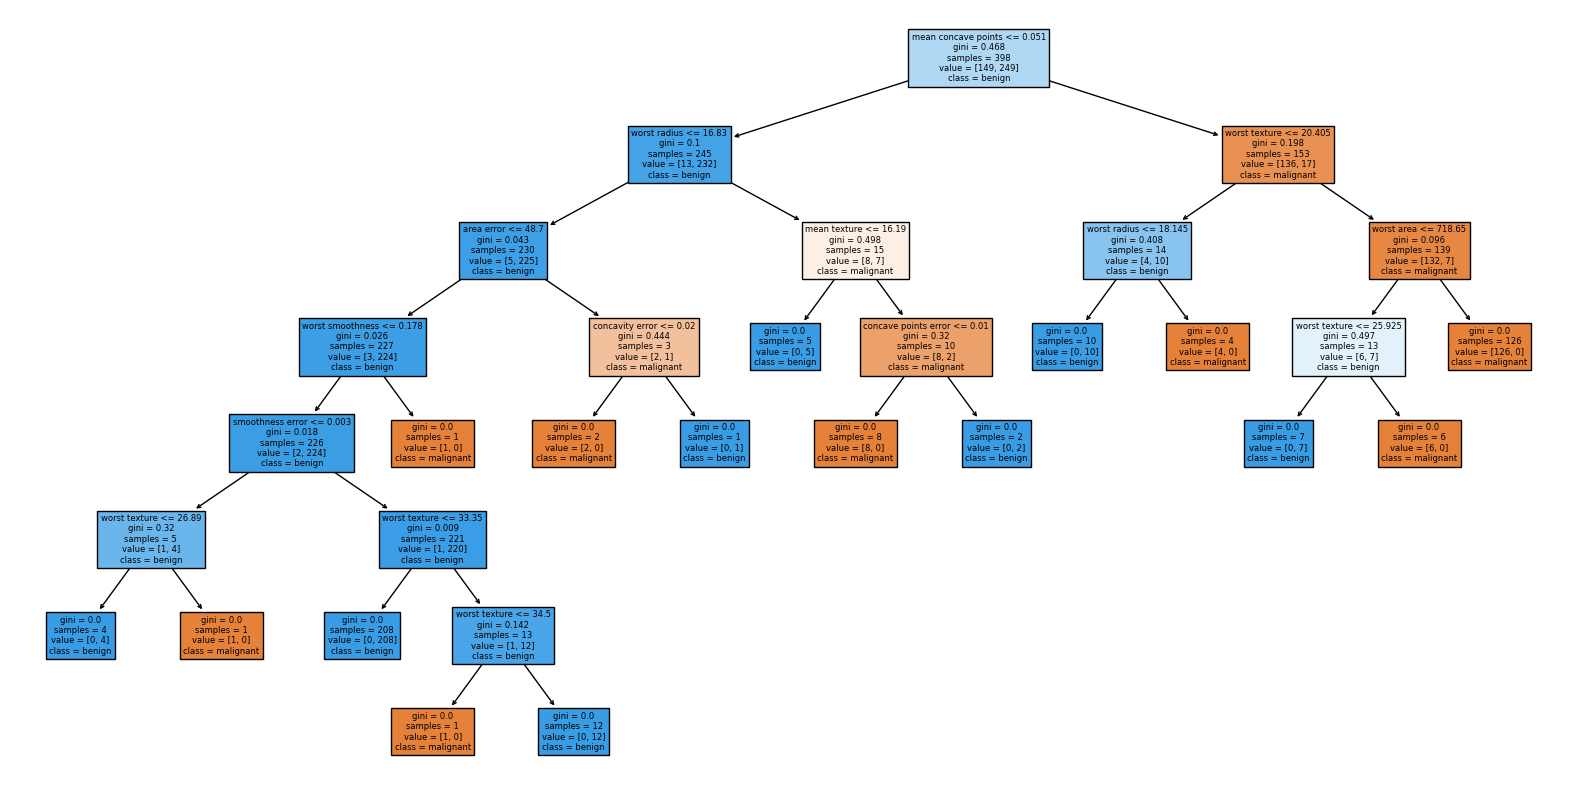

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.3, random_state=42)

#instanciar el clasificador y ajustarlo a los datos:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#predicciones
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

#graficar el árbol de decisión:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names = data.feature_names, class_names = data.target_names)
plt.show()

#### *Ahora haciendo 'fine tuning' con los hiperparámetros*

mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
Accuracy: 0.9649122807017544


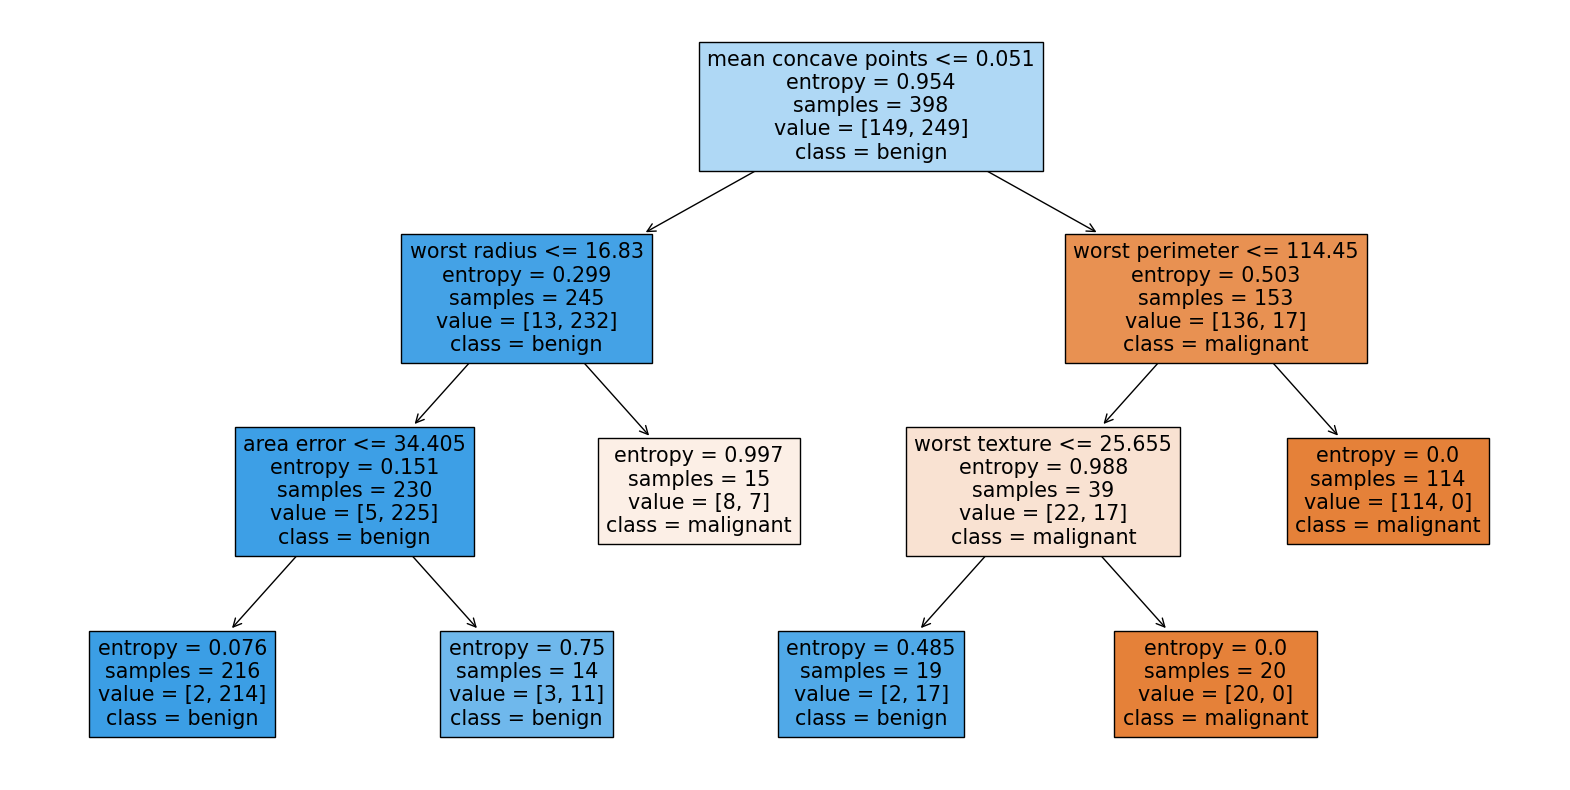

In [29]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'max_depth': np.arange(2,11),
    'min_samples_leaf': np.arange(1,11),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,6)
}

tclf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tclf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("mejores hiperparámetros: ", grid_search.best_params_)
dtc_final = DecisionTreeClassifier(**grid_search.best_params_)
dtc_final.fit(X_train, y_train)
accuracy = dtc_final.score(X_test, y_test)
print("Accuracy:", accuracy)

plt.figure(figsize=(20,10))
plot_tree(dtc_final, filled=True, feature_names = data.feature_names, class_names = data.target_names)
plt.show()

In [31]:
#predicciones
y_pred = dtc_final.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.967     0.937     0.952        63
           1      0.964     0.981     0.972       108

    accuracy                          0.965       171
   macro avg      0.965     0.959     0.962       171
weighted avg      0.965     0.965     0.965       171



In [32]:
#matriz de confusión:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1
0,59,4
1,2,106


In [33]:
59/63 #recall para maligno

0.9365079365079365

In [35]:
106/108 #recall para benigno

0.9814814814814815

In [36]:
 59/61 #precision para 'maligno' (y=0)

0.9672131147540983

In [38]:
 106/110 #precision para 'benigno' (y=1)

0.9636363636363636

### Estandarizando datos

In [39]:
#estandarizar:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'max_depth': np.arange(2,11),
    'min_samples_leaf': np.arange(1,11),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,6)
}

tclf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tclf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("mejores hiperparámetros: ", grid_search.best_params_)
dtc_final = DecisionTreeClassifier(**grid_search.best_params_)
dtc_final.fit(X_train, y_train)
accuracy = dtc_final.score(X_test, y_test)
print("Accuracy:", accuracy)

#predicciones
y_pred = dtc_final.predict(X_test)
print(classification_report(y_test, y_pred, digits = 3))

#matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm


mejores hiperparámetros:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0      0.967     0.937     0.952        63
           1      0.964     0.981     0.972       108

    accuracy                          0.965       171
   macro avg      0.965     0.959     0.962       171
weighted avg      0.965     0.965     0.965       171



,0,1
0,59,4
1,2,106
